# Map Plot

### Change coordinates for Andh and Jhodia (Metadata is erronious) and then load from output
Edit locations in the CSV file for Jhodia (4101) = Same lat as any other Odisha and Andh (3762) = 19.7515 75.7139

In [1]:
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import scipy
import numpy as np
import cartopy.feature as cfeature
from random import random
%matplotlib inline

In [2]:
metadata = pd.read_csv('./data/metadata.csv')

In [3]:
#read from csv
all_india_full = pd.read_csv('./data/all_india_full.csv')

dropped = []
for i in range(37):
    dropped.append("cv_"+str(i+1))
dropped_2 = ["canto_coding_id"]
for item in dropped_2:
    dropped.append(item) 
places = all_india_full.drop(columns=dropped)
places['count'] = places.groupby('culture')['culture'].transform('count')

exist = []
lat = []
lng = []
count = []
language = []
region = []
people = []
locations = pd.DataFrame()
for i, row in places.iterrows():
    if row["culture"] not in exist:
        exist.append(row["culture"])
        language.append(row['language'])
        lat.append(row["lat"])
        lng.append(row["lng"])
        count.append(300*row["count"])
        people.append(row["people"])
        region.append(row["region"])
    else:
        pass
locations["culture"] = exist
locations["lat"] = lat
locations["lng"] = lng
locations["language"] = language
locations["count"] = count
locations["region"] = region
locations["people"] = people
tribal = locations[locations["people"]=="Tribal"].reset_index()
nontribal = locations[locations["people"]=="Non-Tribal"].reset_index()


In [4]:
from matplotlib import colors
# austroasiatic, dravidian, indo-aryan
cmap = colors.ListedColormap(['#D1BECF', '#246EB9', '#A63446'])

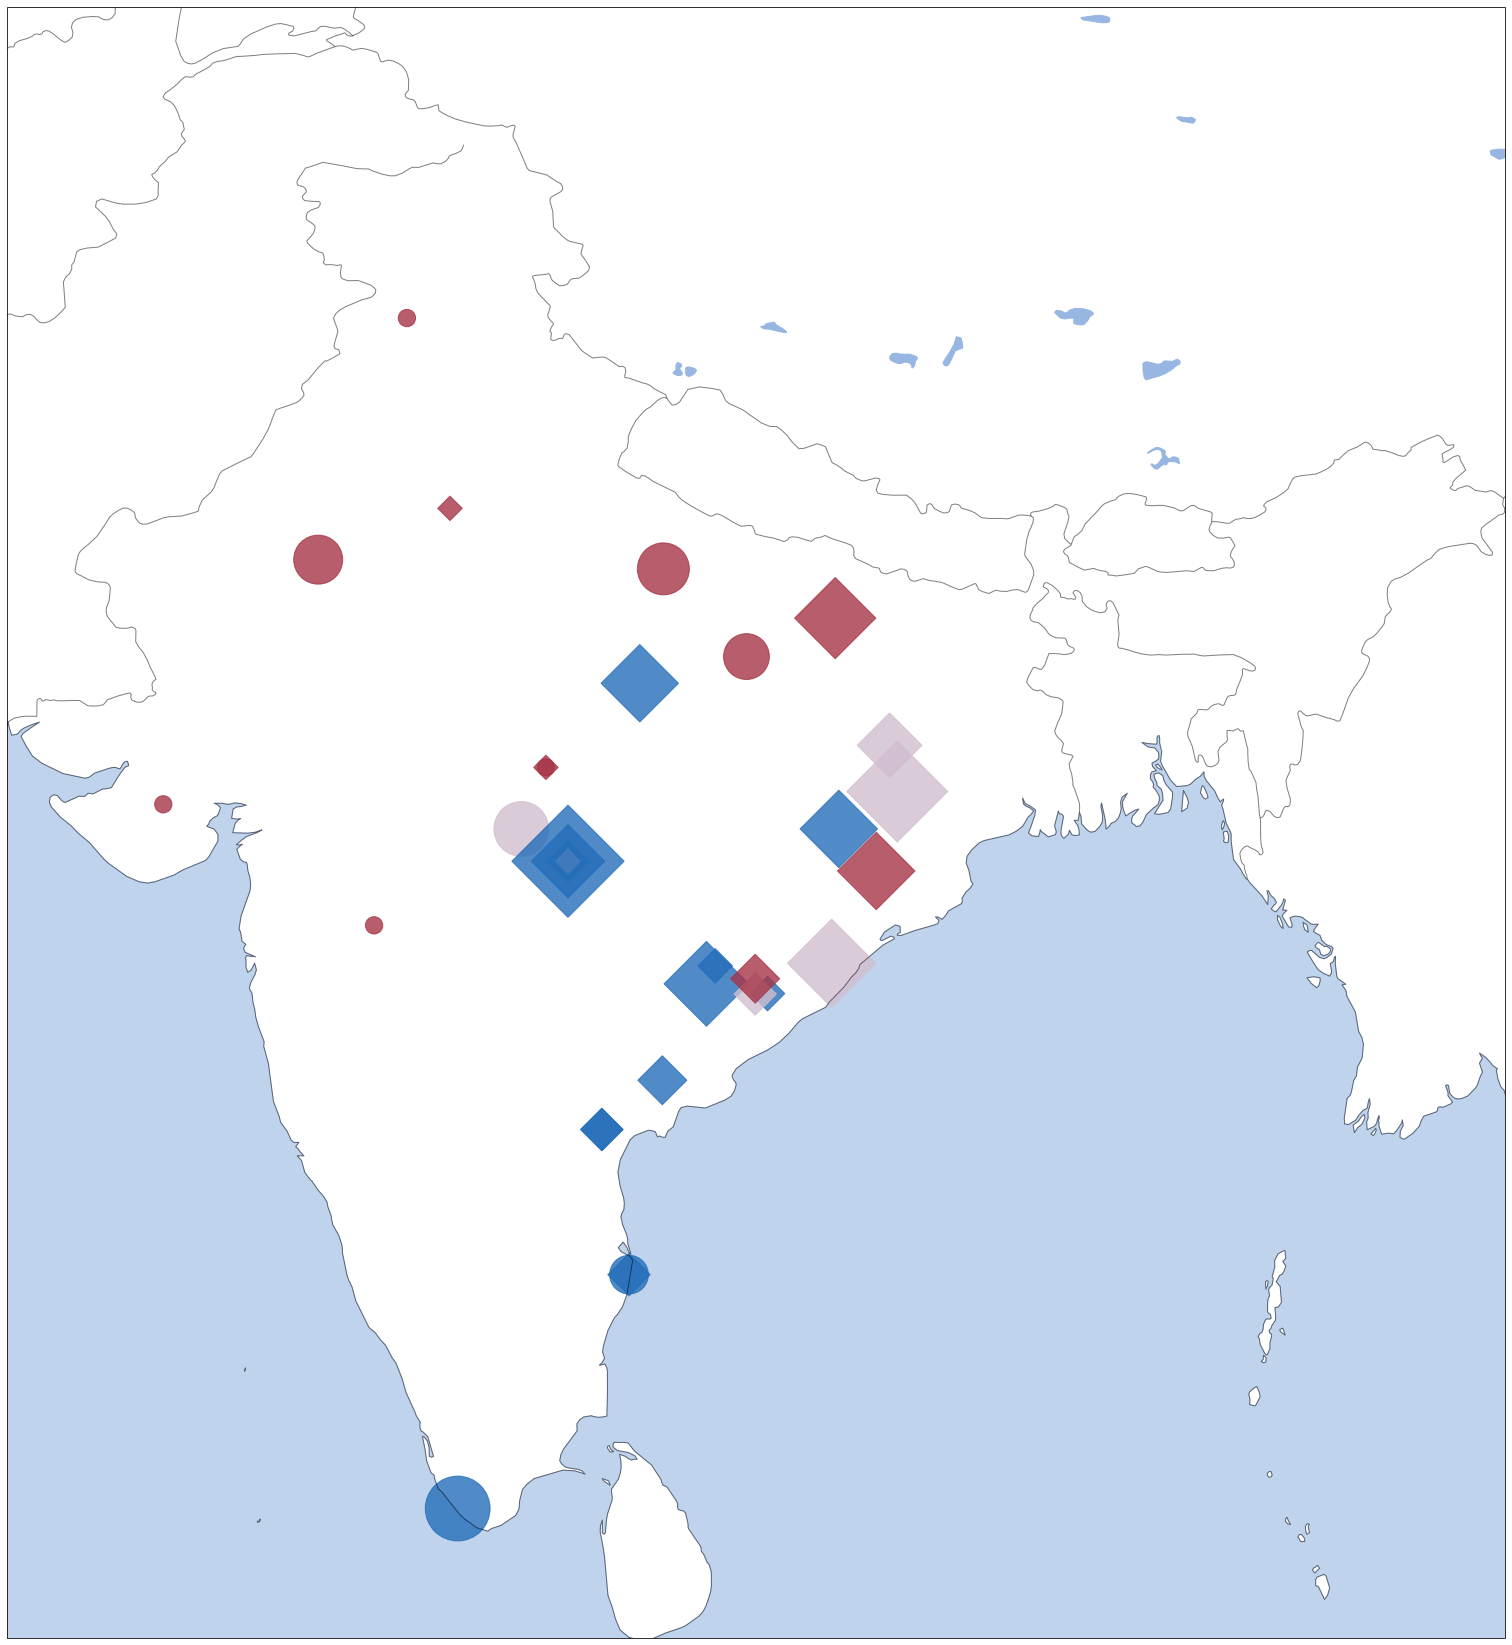

In [5]:
split_index = 14
categories = np.unique(nontribal['language'])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'Avenir'})
plt.rcParams.update({'axes.titlepad': 36.0})

nontribal["Color"] = nontribal['language'].apply(lambda x: colordict[x])
for i, row in nontribal.iterrows():
    if row['Color']==0.5:
        nontribal.loc[i, ['Color']] = .4
tribal["Color"] = tribal['language'].apply(lambda x: colordict[x])
for i, row in tribal.iterrows():
    if row['Color']==0.5:
        tribal.loc[i, ['Color']] = .4        
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([68.14712,97.34466, 6, 37.090000])
north = nontribal.iloc[:split_index]
south = nontribal.iloc[split_index:]

north_label = "North India: "
south_label = "South India:\n"
for i, text in enumerate(north["culture"]):
    if i % 6 ==0:
        north_label+= "\n"+text
    else:    
        north_label+=", "+text
for i, text in enumerate(south["culture"]):
    if i==0:
        south_label+=text
    elif i%6==0:
        south_label+="\n"+text
    else:
        south_label+=", "+text
        
ax.scatter(nontribal.lng, 
           nontribal.lat, 
           c=nontribal['Color'], 
           cmap=cmap, 
           s=nontribal["count"], alpha=.8, marker='o')

ax.scatter(tribal.lng, 
           tribal.lat, 
           c=tribal['Color'], 
           cmap=cmap, 
           s=tribal["count"], alpha=.8, marker='D')

# for i, x in enumerate(nontribal['count']):
#     ax.annotate(str(int(int(x)/300)), (nontribal.loc[i, 'lng']-0.15,nontribal.loc[i, 'lat']), fontsize=20)

# for i, y in enumerate(tribal['culture']):
#     ax.annotate(y, (tribal.loc[i, 'lng'],tribal.loc[i, 'lat']+(random()*1)), fontsize=20)

ax.coastlines(alpha=.5)
ax.add_feature(cfeature.BORDERS, alpha=.5)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.OCEAN, alpha=.6) 
plt.savefig('./figs/mapblank.png')

In [6]:
print("Total number of cultures is ", places['culture'].nunique())

Total number of cultures is  32


In [7]:
nontribal = nontribal.reset_index()

In [8]:
metadata.head(1)

,C-id,Local_lat,Local_long,Region,Division,Subregion,Area/Kingdom,Culture,People,Culture_loc,...,Living_metadata,Recorded_by,Year,Publisher,Publcation_collection,Repository,Classification_notes,Metadata_notes,Sources,Source Tag
0,458,-0.48,15.89,Africa,Central Africa,Equatorial Central Africa,"Cuvette Dept, C Congo",Kouyou,W Equatorial Bantu,"Fort-Rousset, Ouando, Republic of the Congo",...,NaN,"Gilbert Rouget, André Didier, Musée de l'Homme...",1946,Smithsonian Folkways,Music of Equatorial Africa. Folkways Records F...,Ralph Rinzler Folklife Archives and Collection...,NaN,NaN,Introduction by Harold Courlander; notes by Gi...,@FW1950MusicOfEquatorialAfrica


# World Map Plot

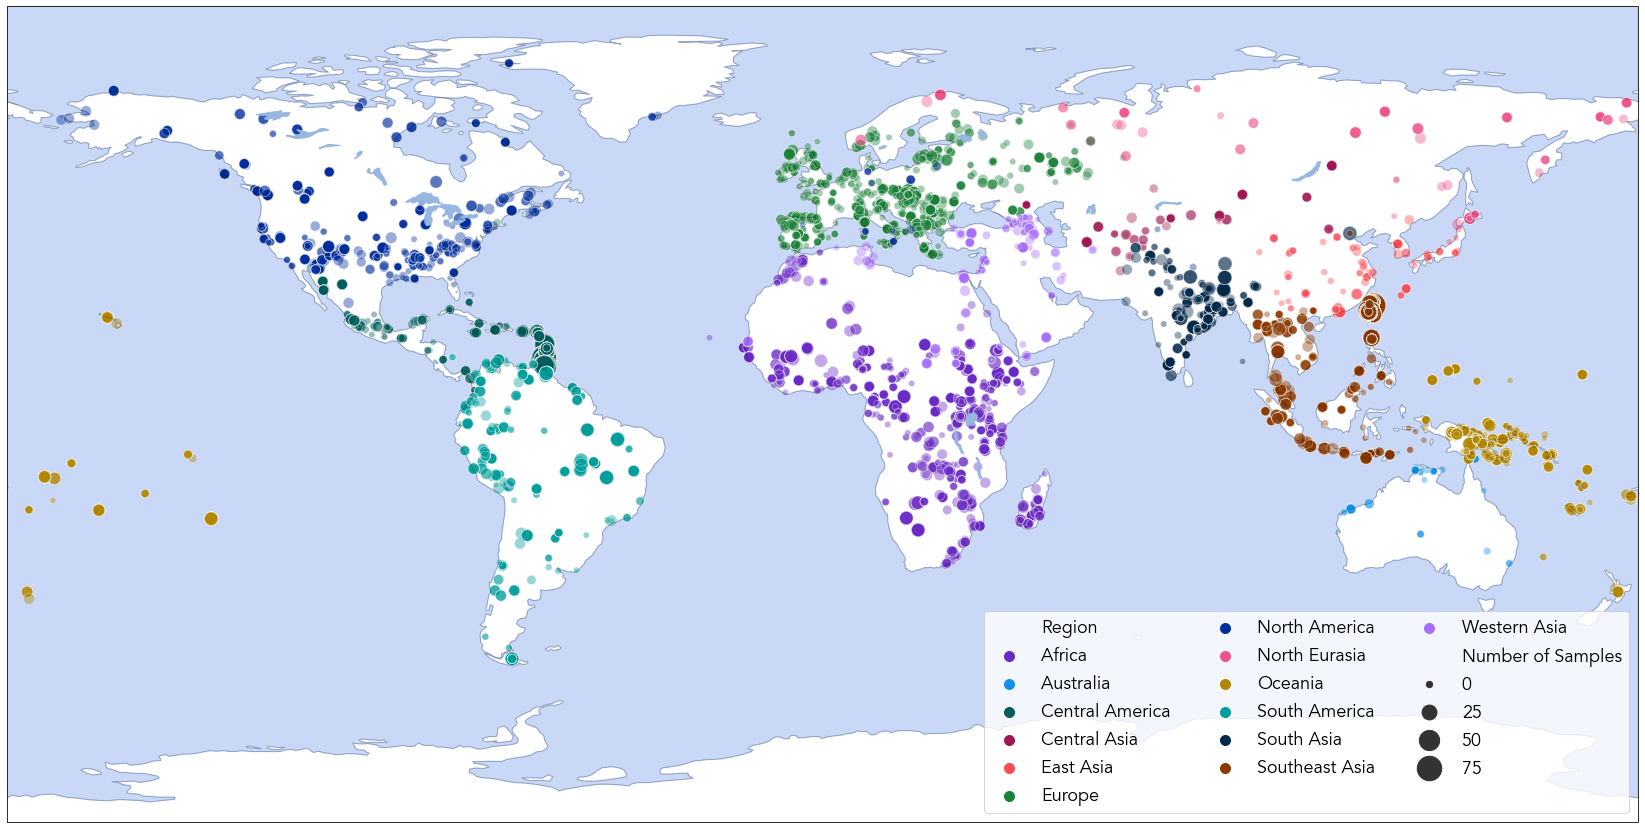

In [18]:
import seaborn as sns
import cartopy.feature

fig = plt.figure(figsize=(30,15))

x = []
y = []

colors = ["#6929c4", "#1192e8", "#005d5d", 
          "#9f1853", "#fa4d56", "#198038", 
          "#002d9c", "#ee538b", "#b28600",
          "#009d9a", "#012749", "#8a3800", "#a56eff"]
sns.set_palette(sns.color_palette(colors))

for i, row in metadata['Local_long'].iteritems():
    x.append(float(row))
    
for i, row in metadata['Local_lat'].iteritems():
    try:
        if row =='19,27':
            y.append(19.27)
        elif row == ' ':
            y.append(40.7410861)
        else:
            y.append(float(row))
    except ValueError as e:
        print(i, e)

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'Avenir'})
plt.rcParams.update({'axes.titlepad': 36.0})

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_global()

metadata['Number of Samples'] = metadata.groupby('Culture')['C-id'].transform('count')

g = sns.scatterplot(x, y, 
                    hue=metadata['Region'], 
                    alpha=.4, 
                    size=metadata['Number of Samples'], sizes=(40, 600))

lgnd = ax.legend(loc="best", markerscale=1.0, ncol=3, fancybox=True)
for i in range(14):
    lgnd.legendHandles[i]._sizes = [100]

ax.coastlines(alpha=.2)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.OCEAN, alpha=.3, facecolor=[0.294, 0.494, 0.886])

plt.savefig("./figs/world.png")